## import necessary libary

In [2]:
import pandas as pd

In [4]:
zoo = pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Data understnding

In [8]:
zoo.shape

(101, 18)

In [5]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

## Remove object type

In [12]:
del zoo['animal name']

## Model Training | Testing | Evaluation

In [14]:
X = zoo.drop('type',axis=1)
y = zoo[['type']]

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [21]:
X_train.shape,y_train.shape

((80, 16), (80, 1))

In [22]:
X_test.shape,y_test.shape

((21, 16), (21, 1))

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#### K =3

In [31]:
knn_classfier = KNeighborsClassifier(n_neighbors=3)
knn_classfier.fit(X_train,y_train)
y_pred = knn_classfier.predict(X_test)

print('accuracy score           :',round(accuracy_score(y_test,y_pred),4))

accuracy score           : 0.9524


#### K=5

In [32]:
knn_classfier = KNeighborsClassifier(n_neighbors=5)
knn_classfier.fit(X_train,y_train)
y_pred = knn_classfier.predict(X_test)

print('accuracy score           :',round(accuracy_score(y_test,y_pred),4))

accuracy score           : 0.9524


#### K=7

In [33]:
knn_classfier = KNeighborsClassifier(n_neighbors=7)
knn_classfier.fit(X_train,y_train)
y_pred = knn_classfier.predict(X_test)

print('accuracy score           :',round(accuracy_score(y_test,y_pred),4))

accuracy score           : 0.9048


#### k=9

In [45]:
knn_classfier = KNeighborsClassifier(n_neighbors=9)
knn_classfier.fit(X_train,y_train)
y_pred = knn_classfier.predict(X_test)

print('accuracy score           :',round(accuracy_score(y_test,y_pred),4))

accuracy score           : 0.8095


## choose K optimum number

In [35]:
from sklearn.model_selection import cross_val_score

In [47]:
cv_scores = []
for i in range(1,31,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(estimator=knn_model,X=X,y=y,cv=5)
    cv_scores.append(cross_val.mean())

In [48]:
cv_scores

[0.97,
 0.93,
 0.8509523809523811,
 0.8414285714285714,
 0.7919047619047619,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.7419047619047618,
 0.7128571428571429,
 0.7028571428571427,
 0.7028571428571427,
 0.6928571428571428]

In [49]:
cv_scores.index(max(cv_scores))

0

### Using visuals

In [46]:
import matplotlib.pyplot as plt

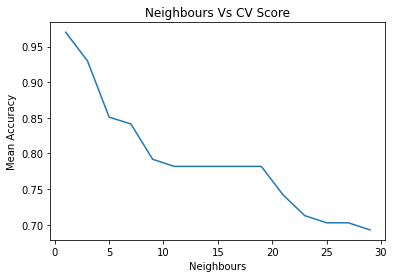

In [52]:
plt.plot(range(1,31,2),cv_scores)
plt.title('Neighbours Vs CV Score')
plt.xlabel('Neighbours')
plt.ylabel('Mean Accuracy')
plt.show()

### Conclusion

#### 1 Neighbours is the Optimal Number for this data.